### CS 584 Machine Learning S24
### Professor - Steve Avsec 
### Final Project - Airline Passenger Satisfaction
### Student Name- Saurabh Sonawale A20539793

In [1]:
# Importing libraries for data loading, basic data processing and visualizations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


### Data Pre - Processing

In [2]:
# Loading the training and test datasets

df_train = pd.read_csv(r'C:\Users\Saurabh\Desktop\cs584 ML\train.csv')
df_test = pd.read_csv(r'C:\Users\Saurabh\Desktop\cs584 ML\test.csv')

In [3]:
# Having a look at our training dataset

df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Dropping the unnecessary columns

df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('id', axis=1)

In [5]:
# Having a look at the data types of the features in training dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
# Having a look at our testing dataset

df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
# Dropping the unnecessary columns

df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

In [8]:
# Having a look at the data types of the features in testing dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [9]:
# Remapping Sentiments with Numerical Values in training and testing datasets

df_train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
df_test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [10]:
# Having a look at the number of Positive and Negative sentiments in training dataset to check the balance

df_train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

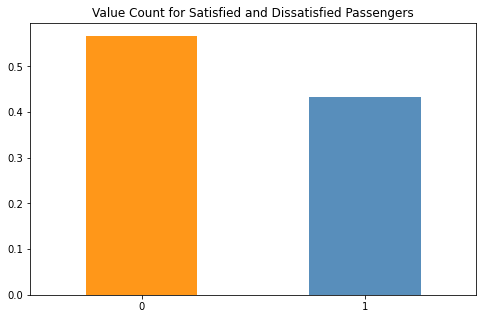

In [11]:
# Visualzing the number of Positive and Negative sentiments

fig = plt.figure(figsize = (8,5))
df_train.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0, color= ['darkorange','steelblue'])

plt.title('Value Count for Satisfied and Dissatisfied Passengers')
plt.show()

In [12]:
# Checking the number of Null Values in training dataset

df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
# Checking the number of Null Values in testing dataset

df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
# Replacing the null values with mean of the feature

df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

### Exploratory Data Analysis

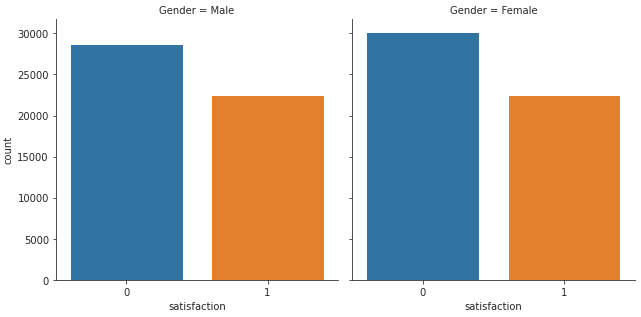

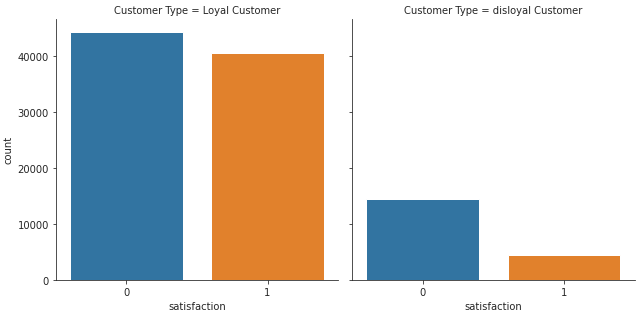

In [15]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df_train, kind="count", height=4.5, aspect=1.0)

**Gender -**
From the graphs above we can see that passenger dissatisfaction is quite similar across the genders, with female passengers a bit disssatisfied than male passengers.

**Customer Types -**
It can be seen that there are a lot more Loyal Customers for the arline than the disloyal ones, but even though that is the case, there seem to be a lot more disssatisfied customers across both customer types.

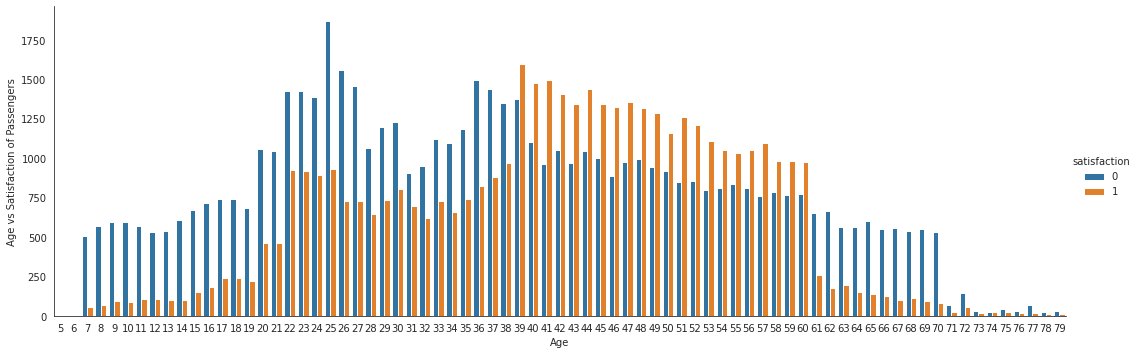

In [16]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df_train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Satisfaction of Passengers')

**Age -**
It is observed that from age 7 to 38 and from age 61 to 79 the number of disssatisfied passengers is comparatively higher, which gives us an insight as to which target group should the airline focus to improve the passenger satisfaction ratings.

On the contrary, we can see that passenger in the age 39 - 60 are satisfied with their experience.

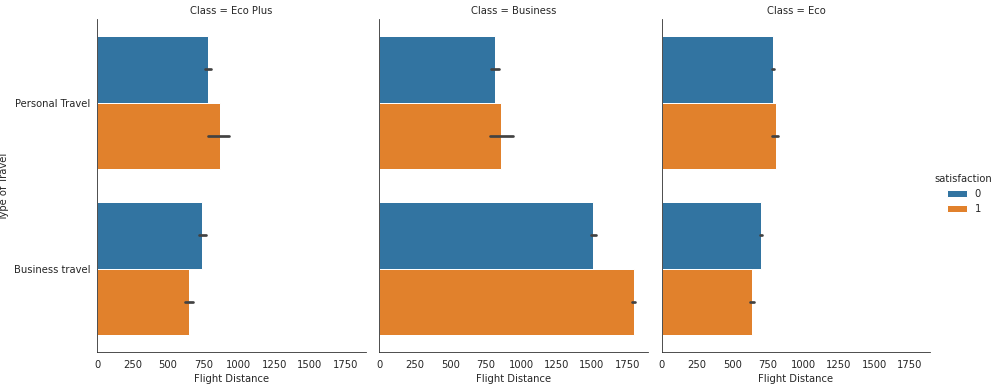

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df_train, kind="bar", 
                    height=5.5, aspect=.8)

**Class, Flight Distance and Type of Travel**

We can see that for Eco, Eco Plus and Business class passengers who are travelling for Personal Reasons the number of Satisfied customers are just a bit more than disssatisfied passengers.

Also we can observe an interesting comparision here, the passengers who are traveling for Business Purpose, but are travelling through Eco and Eco Plus class are more disssatisfied, on the contrary the passengers travelling by Business class for Business Purpose are more satisfied. 

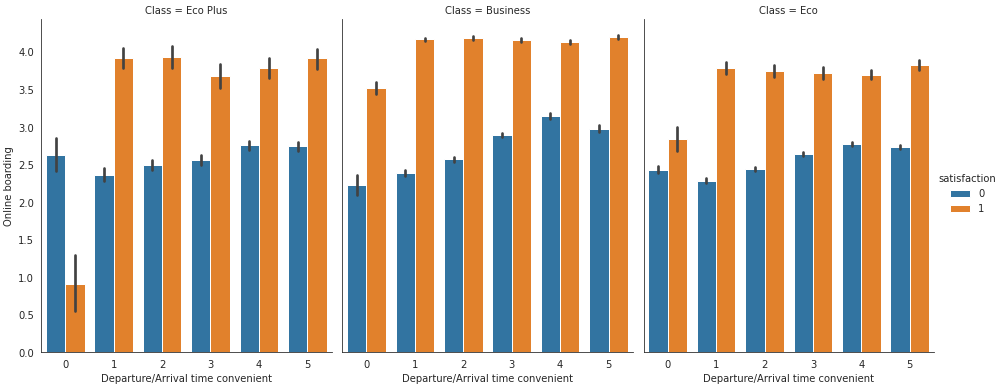

In [18]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Departure/Arrival Time, Online Boarding grouped by Class**

Except for the Eco Plus class which has higher number of disssatisfied passengers, where they have provided 0 rating, there seems to be more number of satisfied passengers across classes.

This analysis proves that passengers need convenient features like Online Boarding to make thier flight experience pleasing.

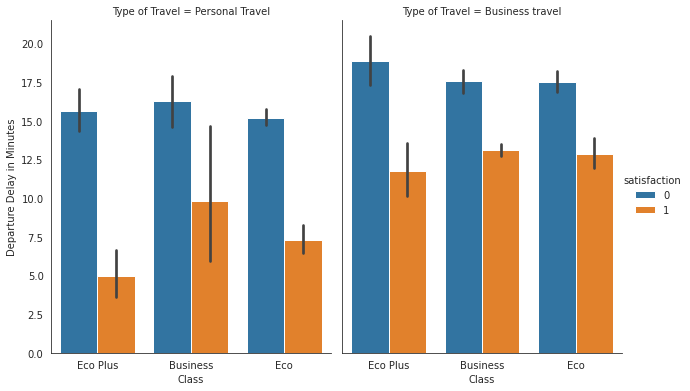

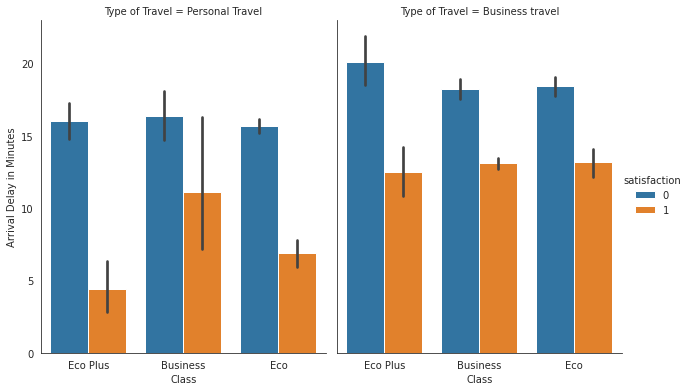

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)
    
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Arrival and Departure Delay grouped by Type of Travel**

From the graphs above it is evident that no passenger likes delays. The number of disssatisfied passengers travelling for Business Purpose are greater than those travelling for Personal Reasons.

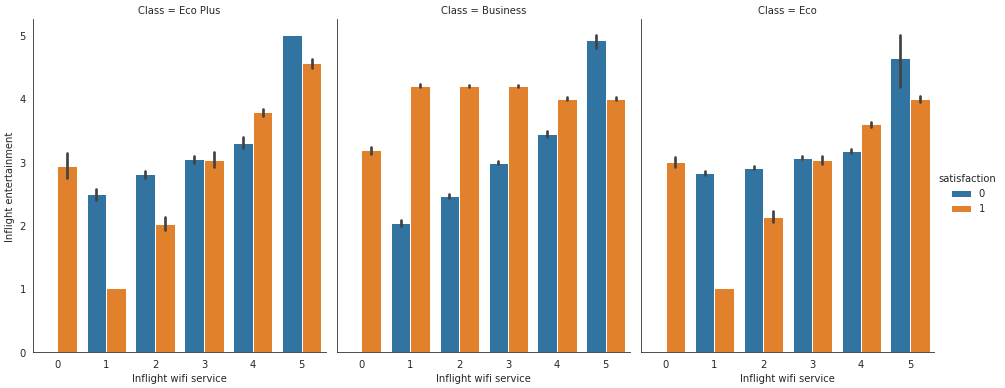

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df_train, 
                    kind="bar", height=5.5, aspect=.8)

**Inflight WiFi and Entertainment grouped by Class**

We have a very unusual stat here, where we can see that Eco Plus passengers are satisfied even if they do not have any WiFi services or just Mid Level of Entertainment.

For Business class passengers it is evident that they need the highest levels of WiFi and Entertainment services as they have paid a significantly higher amount of charges per seat.

For Eco passengers, they need high level of Entertainment and WiFi services to be satisfied.

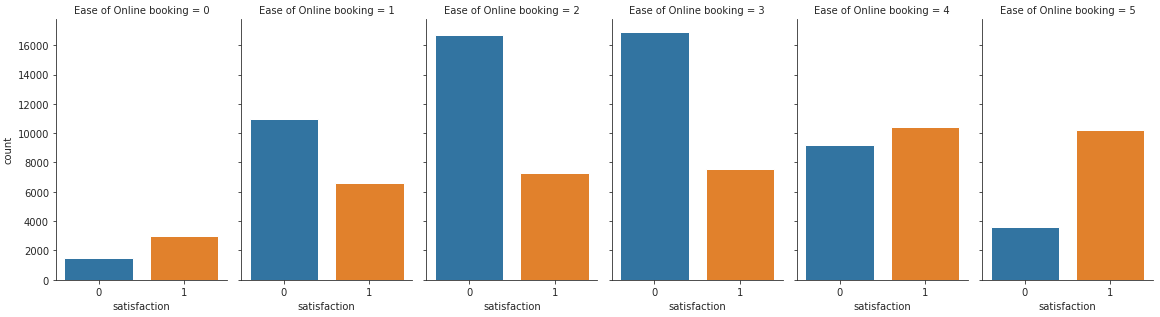

In [21]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df_train, kind="count", height=4.5, 
                    aspect=.6)

**Ease of Online Booking**

We can see that passengers are only satisfied with the highest level of convenience of ratings 4 and 5 to be satisfied.

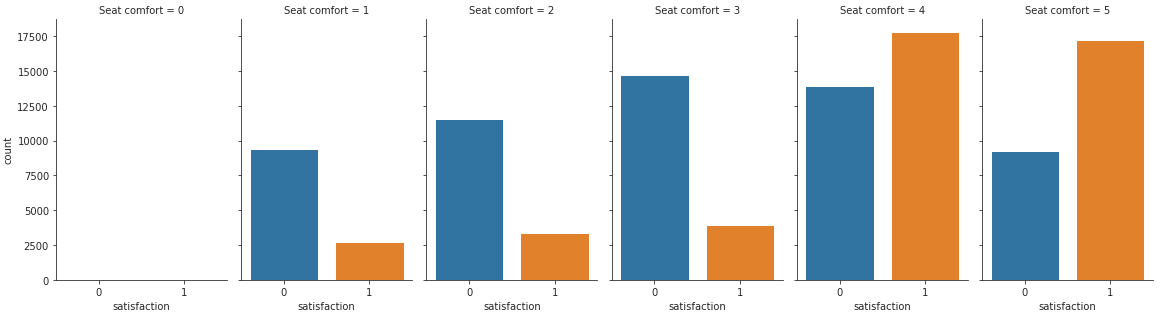

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Seat Comfort**
​
We can see that passengers are only satisfied with the highest level of seat comforts, where they are probably getting more leg space or window seats which has ratings 4 and 5 to be satisfied.

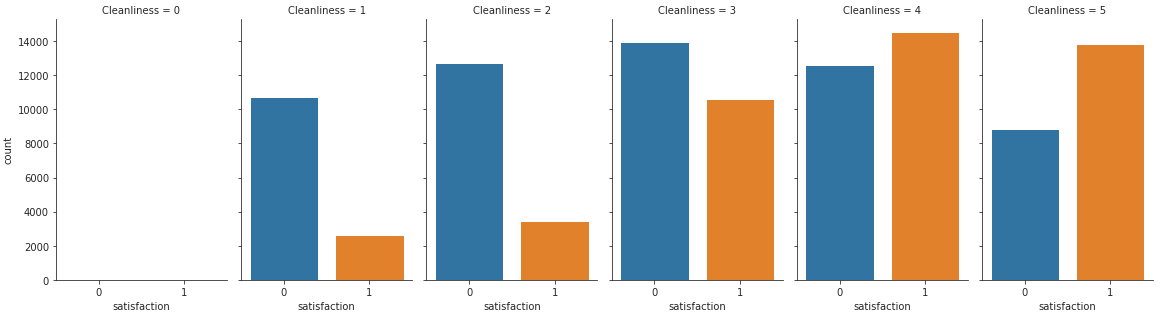

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Cleanliness**
​
We can see that passengers are only satisfied with the highest level of cleanliness of ratings 4 and 5 to be satisfied.

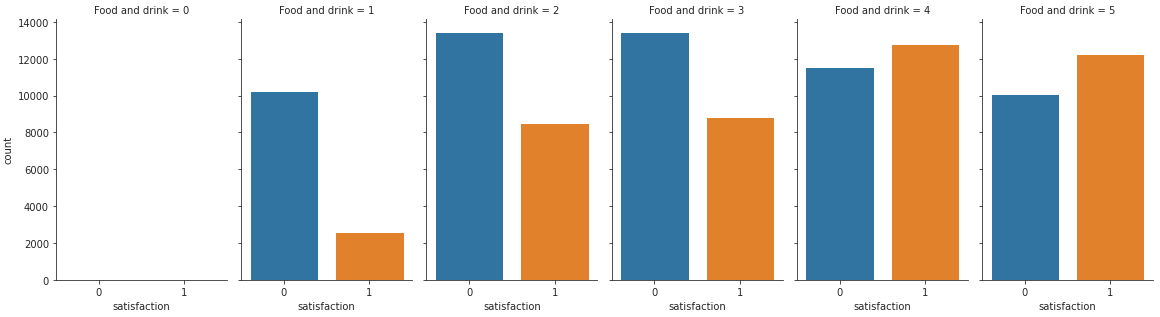

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=df_train, kind="count", height=4.5, aspect=.6)

**Food and Drinks**
​
We can see that passengers are only satisfied with the highest level of Food and Drink where they are probably getting all of the requested food and drinks which has ratings 4 and 5 to be satisfied.

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction'>

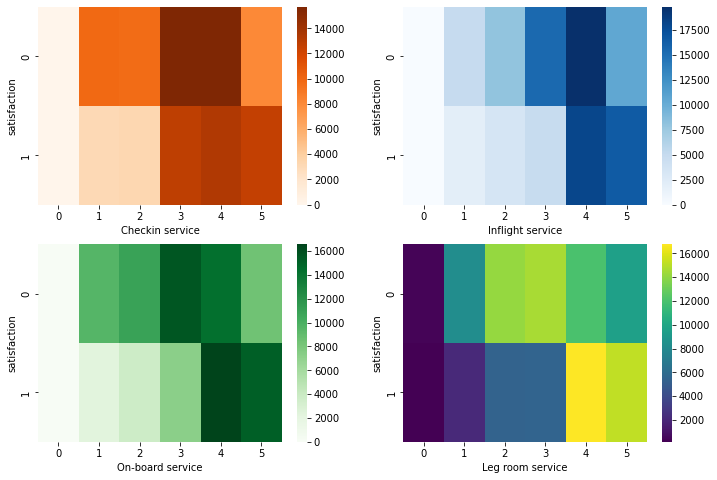

In [25]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df_train['satisfaction'], df_train['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df_train['satisfaction'], df_train['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df_train['satisfaction'], df_train['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df_train['satisfaction'], df_train['Leg room service'])
sns.heatmap(table4, cmap='viridis', ax = axarr[1][1])

**Checkin Service, Inflight Service, On-Board Service, Leg-room service**

Except for the checkin service, which has 0 to 2 ratings provided by passengers who look to be the most dissatisfied, for rest of services, passengers who provided 4 and 5 ratings seem to be satisfied.

In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



# Encoding categorical variables
le = LabelEncoder()
for column in df_train.select_dtypes(include=['object']).columns:
    df_train[column] = le.fit_transform(df_train[column])
    df_test[column] = le.transform(df_test[column])

# Detecting and removing outliers in the training dataset
q1 = df_train.quantile(0.25)
q3 = df_train.quantile(0.75)
iqr = q3 - q1
df_train = df_train[~((df_train < (q1 - 1.5 * iqr)) | (df_train > (q3 + 1.5 * iqr))).any(axis=1)]

# Using Min Max Scaler to scale the values
mms = MinMaxScaler()
df_train_scaled = pd.DataFrame(mms.fit_transform(df_train), columns=df_train.columns)
df_test_scaled = pd.DataFrame(mms.transform(df_test), columns=df_test.columns)

# Using Chi-Square Distribution to check the most relevant features
X_train = df_train_scaled.drop('satisfaction', axis=1)
y_train = df_train_scaled['satisfaction']
best_features = SelectKBest(chi2, k=10)
best_features.fit(X_train, y_train)
X_train_best = X_train[X_train.columns[best_features.get_support(indices=True)]]

df_train_scaled.shape, df_train_scaled.head(), X_train_best.columns.tolist()

((61197, 23),
    Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
 0     1.0            0.0  0.076923             1.0    1.0         0.115789   
 1     0.0            0.0  0.243590             0.0    0.0         0.299865   
 2     1.0            0.0  0.692308             0.0    0.0         0.049393   
 3     0.0            0.0  0.243590             1.0    0.5         0.310121   
 4     1.0            0.0  0.512821             1.0    0.5         0.336032   
 
    Inflight wifi service  Departure/Arrival time convenient  \
 0                    0.6                                0.8   
 1                    0.4                                0.4   
 2                    0.6                                0.6   
 3                    0.6                                0.8   
 4                    0.4                                0.8   
 
    Ease of Online booking  Gate location  ...  Inflight entertainment  \
 0                     0.6            0.2  ...    

In [35]:
import numpy as np
import random
from scipy.stats import mode

# Custom DecisionTree implementation

class DecisionTree:
    def __init__(self, max_features='sqrt', max_depth=10, min_samples_split=2, default_class=0):
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
        self.default_class = default_class  # default fallback class

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, y, left_indices, right_indices):
        weight_l = np.sum(left_indices) / len(y)
        weight_r = np.sum(right_indices) / len(y)
        parent_entropy = self.entropy(y)
        left_entropy = self.entropy(y[left_indices])
        right_entropy = self.entropy(y[right_indices])
        return parent_entropy - (weight_l * left_entropy + weight_r * right_entropy)

    def best_split(self, X, y):
        best_metric = -1
        best_split = None
        n_features = X.shape[1]
        feature_indices = random.sample(list(range(n_features)), min(n_features, self.max_features if isinstance(self.max_features, int) else int(np.sqrt(n_features))))
        for feature_index in feature_indices:
            values = X.iloc[:, feature_index]
            possible_splits = np.unique(values)
            for value in possible_splits:
                left_indices = values <= value
                right_indices = values > value
                if np.sum(left_indices) < self.min_samples_split or np.sum(right_indices) < self.min_samples_split:
                    continue
                curr_metric = self.information_gain(y, left_indices, right_indices)
                if curr_metric > best_metric:
                    best_metric = curr_metric
                    best_split = (feature_index, value)
        return best_split

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split or not y.size:
            if len(y) == 0:
                # This is a safeguard for an empty dataset segment, which theoretically shouldn't happen
                return None  # or a default class if known
            # Directly use the first element if only one is left, avoiding mode calculation
            if len(y) == 1:
                return y.iloc[0]
            # Calculate mode safely
            try:
                most_common = mode(y).mode[0]
                return most_common
            except IndexError:
                # This would handle any unexpected empty arrays from mode computation
                return y.iloc[0] if y.size else None
        split = self.best_split(X, y)
        if split is None:
            try:
                most_common = mode(y).mode[0]
                return most_common
            except IndexError:
                return y.iloc[0] if y.size else None
        feature_index, split_value = split
        left_indices = X.iloc[:, feature_index] <= split_value
        right_indices = X.iloc[:, feature_index] > split_value
        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1)
        return (feature_index, split_value, left_subtree, right_subtree)

    def predict(self, X):
        results = np.array([self.predict_one(row, self.tree) for index, row in X.iterrows()])
        return results

    def predict_one(self, input_row, node):
        if not isinstance(node, tuple):
            return node if node is not None else self.default_class
        feature_index, threshold, left_subtree, right_subtree = node
        if input_row[feature_index] <= threshold:
            return self.predict_one(input_row, left_subtree)
        else:
            return self.predict_one(input_row, right_subtree)

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        if self.max_features == 'sqrt':
            self.max_features = int(np.sqrt(self.n_features_))
        elif self.max_features == 'log2':
            self.max_features = int(np.log2(self.n_features_))
        else:
            self.max_features = self.n_features_
        self.tree = self.build_tree(X, y, depth=0)


# Custom RandomForest implementation
class RandomForest:
    def __init__(self, n_estimators=100, max_features='sqrt', max_depth=10, min_samples_split=2, default_class=0):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.default_class = default_class

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_features=self.max_features,
                                max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split)
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees if tree.tree is not None])
        if tree_preds.size == 0:
            return np.array([self.default_class] * len(X))  # Fallback if no trees predicted
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        final_predictions = mode(tree_preds, axis=1, nan_policy='omit').mode
        return final_predictions.flatten() if final_predictions.size > 0 else np.array([self.default_class] * len(X))

In [36]:
def calculate_accuracy(predictions, actual):
    correct_predictions = (predictions == actual).sum()  # Count how many predictions match the actual values
    total_predictions = len(predictions)  # Total number of predictions made
    accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage
    return accuracy

def calculate_precision(predictions, actual):
    true_positive = np.sum((predictions == 1) & (actual == 1))
    predicted_positive = np.sum(predictions == 1)
    precision = true_positive / predicted_positive if predicted_positive != 0 else 0
    return precision

def calculate_recall(predictions, actual):
    true_positive = np.sum((predictions == 1) & (actual == 1))
    actual_positive = np.sum(actual == 1)
    recall = true_positive / actual_positive if actual_positive != 0 else 0
    return recall

def calculate_f1_score(predictions, actual):
    precision = calculate_precision(predictions, actual)
    recall = calculate_recall(predictions, actual)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score


In [37]:
# Selecting only the top features identified earlier for both training and testing sets
X_train_best_features = X_train_best
X_test_best_features = df_test_scaled[X_train_best.columns]

In [38]:
tree = DecisionTree(max_features='sqrt', max_depth=10, min_samples_split=2)
tree.fit(X_train_best_features, y_train)
predictions = tree.predict(X_test_best_features)

Model Accuracy: 81.15%


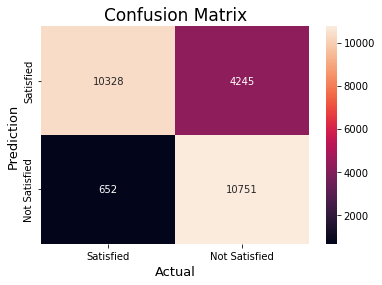

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     14573
         1.0       0.72      0.94      0.81     11403

    accuracy                           0.81     25976
   macro avg       0.83      0.83      0.81     25976
weighted avg       0.84      0.81      0.81     25976



In [39]:
y_test = df_test_scaled['satisfaction']
accuracy_percentage = calculate_accuracy(predictions, y_test)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

y_test = np.array(y_test)
predictions = np.array(predictions)


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm, 

            annot=True,

            fmt='g', 

            xticklabels=['Satisfied','Not Satisfied'],

            yticklabels=['Satisfied','Not Satisfied'])

plt.ylabel('Prediction',fontsize=13)

plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

print(classification_report(y_test, predictions))

In [40]:
#Random Forest
X_train_best_features = X_train_best
X_test_best_features = df_test_scaled[X_train_best.columns]
y_train = df_train_scaled['satisfaction']
# Initializing the RandomForest with fewer trees for faster computation in this demo
rf_model = RandomForest(n_estimators=10, max_features='sqrt', max_depth=10, min_samples_split=2)

# Fitting the RandomForest model to the training data
rf_model.fit(X_train_best_features, y_train)

# Making predictions on the test data
predictions = rf_model.predict(X_test_best_features)

Model Accuracy: 91.09%


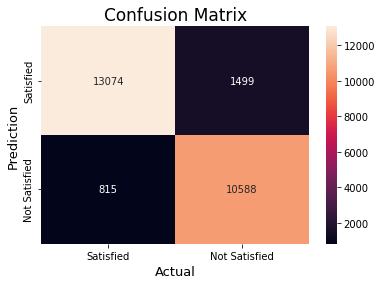

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     14573
         1.0       0.88      0.93      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



In [41]:
y_test = df_test_scaled['satisfaction']
accuracy_percentage = calculate_accuracy(predictions, y_test)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

y_test = np.array(y_test)
predictions = np.array(predictions)


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm, 

            annot=True,

            fmt='g', 

            xticklabels=['Satisfied','Not Satisfied'],

            yticklabels=['Satisfied','Not Satisfied'])

plt.ylabel('Prediction',fontsize=13)

plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

print(classification_report(y_test, predictions))

In [42]:
# KNN
def euclidean_distance_tf(data1, data2):
    data1 = tf.expand_dims(data1, 1)
    distances = tf.reduce_sum(tf.square(data1 - data2), axis=2)
    return tf.sqrt(distances)

def predict_classification_tf(training_set, training_labels, test_instance, k):
    train_tensor = tf.convert_to_tensor(training_set, dtype=tf.float32)
    test_tensor = tf.convert_to_tensor(test_instance, dtype=tf.float32)
    labels_tensor = tf.convert_to_tensor(training_labels, dtype=tf.int32)

    # Calculate distances
    distances = euclidean_distance_tf(test_tensor, train_tensor)

    # Get k nearest neighbors
    _, indices = tf.nn.top_k(tf.negative(distances), k=k)
    indices = tf.reshape(indices, [-1])  # Ensure indices are flattened

    # Gather labels of nearest neighbors
    nearest_labels = tf.gather(labels_tensor, indices)

    # Majority vote
    y, idx, count = tf.unique_with_counts(nearest_labels)
    majority_label = y[tf.argmax(count)]

    return majority_label.numpy()  # Return the prediction

selected_features = X_train_best.columns
# When you fit your MinMaxScaler, make sure you are doing so on the training set and only with the selected features.
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(df_train[selected_features])  # Fitting and transforming the training data

# Ensure the test set has the same selected features as the training set before transforming
if all(feature in df_test.columns for feature in selected_features):
    X_test_scaled = mms.transform(df_test[selected_features])  # Transforming the test data
else:
    missing_cols = [feature for feature in selected_features if feature not in df_test.columns]
    raise ValueError(f"Missing columns in test set that were present during scaler fitting: {missing_cols}")


X_train = df_train_scaled[selected_features].to_numpy(dtype=np.float32)
y_train = df_train_scaled['satisfaction'].to_numpy(dtype=np.int32)
X_test = mms.transform(df_test[selected_features])

# Predict using the revised TensorFlow function
k = 5
predictions = [predict_classification_tf(X_train, y_train, np.array([test_instance]), k) for test_instance in X_test[:]]


Model Accuracy: 88.92%


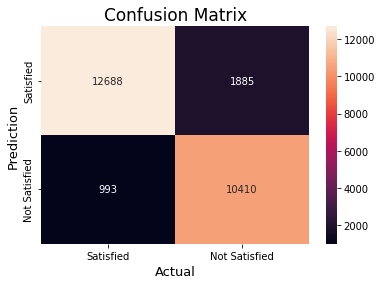

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     14573
         1.0       0.85      0.91      0.88     11403

    accuracy                           0.89     25976
   macro avg       0.89      0.89      0.89     25976
weighted avg       0.89      0.89      0.89     25976



In [43]:
y_test = df_test_scaled['satisfaction']
accuracy_percentage = calculate_accuracy(predictions, y_test)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

y_test = np.array(y_test)
predictions = np.array(predictions)


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,predictions)

sns.heatmap(cm, 

            annot=True,

            fmt='g', 

            xticklabels=['Satisfied','Not Satisfied'],

            yticklabels=['Satisfied','Not Satisfied'])

plt.ylabel('Prediction',fontsize=13)

plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

print(classification_report(y_test, predictions))